In [1]:
library(tidyverse)


Warning message:
“package ‘ggplot2’ was built under R version 4.3.1”
Warning message:
“package ‘lubridate’ was built under R version 4.3.1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# Create a blank matrix
adjacency_matrix <- matrix(0, nrow=10, ncol=10)

# Define the names for the rows and columns for clarity
rownames(adjacency_matrix) <- c("5", "6", "D", "3", "4", "B", "C", "A", "2", "1")
colnames(adjacency_matrix) <- c("5", "6", "D", "3", "4", "B", "C", "A", "2", "1")

# Connections for 5
adjacency_matrix["5", c("D", "6", "3")] <- 1

# Connections for 6
adjacency_matrix["6", c("D", "B", "5")] <- 1

# Connections for D
adjacency_matrix["D", c("5", "6", "3", "B", "C")] <- 1

# Connections for 3
adjacency_matrix["3", c("D", "4", "C", "B", "5")] <- 1

# Connections for 4
adjacency_matrix["4", c("3", "C")] <- 1

# Connections for B
adjacency_matrix["B", c("6", "D", "C", "A", "3")] <- 1

# Connections for C
adjacency_matrix["C", c("3", "4", "B", "D", "A")] <- 1

# Connections for A
adjacency_matrix["A", c("C", "B", "2")] <- 1

# Connections for 2
adjacency_matrix["2", c("A", "1")] <- 1

# Connections for 1
adjacency_matrix["1", "2"] <- 1

# Since the graph is undirected, we mirror the matrix along the diagonal
adjacency_matrix <- adjacency_matrix + t(adjacency_matrix)
# convert where the value is 2 to 1
adjacency_matrix[adjacency_matrix == 2] <- 1

#sort the matrix
adjacency_matrix <- adjacency_matrix[order(rownames(adjacency_matrix)), order(colnames(adjacency_matrix))]

# Print out the matrix
adjacency_matrix

,1,2,3,4,5,6,A,B,C,D
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1
4,0,0,1,0,0,0,0,0,1,0
5,0,0,1,0,0,1,0,0,0,1
6,0,0,0,0,1,0,0,1,0,1
A,0,1,0,0,0,0,0,1,1,0
B,0,0,1,0,0,1,1,0,1,1
C,0,0,1,1,0,0,1,1,0,1
D,0,0,1,0,1,1,0,1,1,0


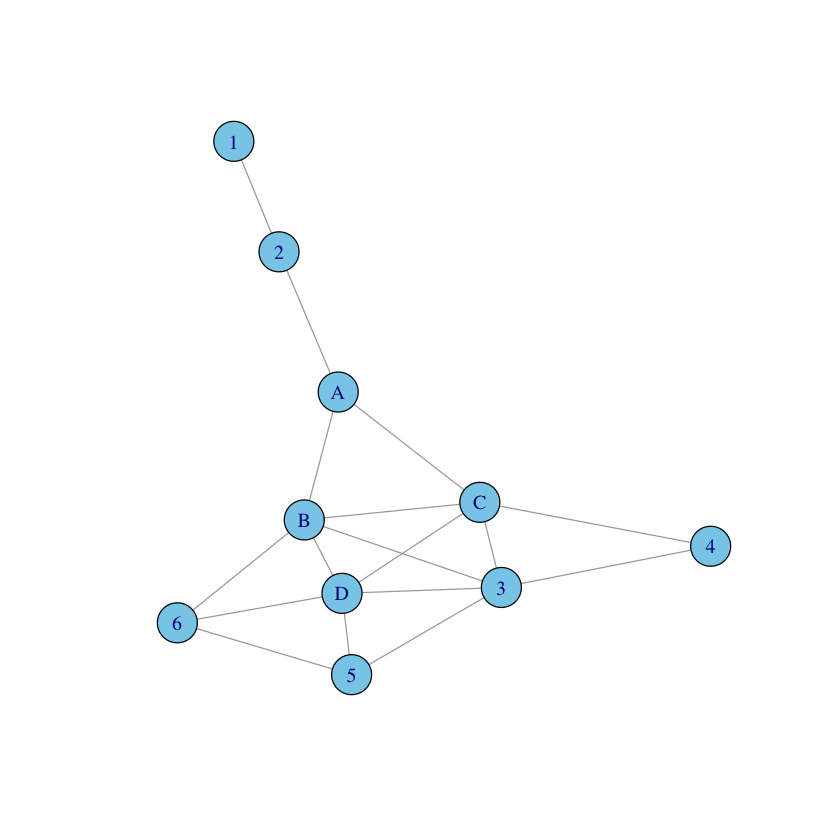

In [6]:
library(igraph)

graph <- graph_from_adjacency_matrix(adjacency_matrix, mode = "undirected")

# Plot the graph
plot(graph, layout = layout_nicely(graph), vertex.color = "skyblue", edge.arrow.size = 0.5)

In [23]:
# Calculate degree centrality for all nodes
degree_centrality <- degree(graph, mode = "all")

# Calculate closeness centrality for all nodes
closeness_centrality <- closeness(graph, mode = "all")

# Calculate betweenness centrality for all nodes
betweenness_centrality <- betweenness(graph, directed = FALSE, normalized = TRUE)

centrality_measures_all <- data.frame(
    Degree = degree_centrality,
    Closeness = closeness_centrality,
    Betweenness = betweenness_centrality
)

centrality_measures_all

,Degree,Closeness,Betweenness
,<dbl>,<dbl>,<dbl>
1,1,0.03333333,0.00000000
2,2,0.04545455,0.22222222
3,5,0.06250000,0.12870370
4,2,0.05000000,0.00000000
5,3,0.04761905,0.01481481
6,3,0.05263158,0.02592593
A,3,0.06250000,0.38888889
B,5,0.07142857,0.25092593
C,5,0.07142857,0.23888889


In [24]:
# Extract the centralities for seats A-D
seat_choices <- c('A', 'B', 'C', 'D')
centrality_measures <- data.frame(
    Degree = degree_centrality[seat_choices],
    Closeness = closeness_centrality[seat_choices],
    Betweenness = betweenness_centrality[seat_choices]
)
rownames(centrality_measures) <- seat_choices

# Output the centrality measures
centrality_measures

,Degree,Closeness,Betweenness
,<dbl>,<dbl>,<dbl>
A,3,0.06250000,0.38888889
B,5,0.07142857,0.25092593
C,5,0.07142857,0.23888889
D,5,0.06250000,0.09074074


In [9]:
install.packages("kableExtra")

also installing the dependency ‘svglite’





The downloaded binary packages are in
	/var/folders/xv/82nrs8ss4rn0026nl3bv5t900000gn/T//RtmpOA6Xns/downloaded_packages


In [12]:
# make a visually appealing table in the notebook
centrality_measures %>%
  knitr::kable(caption = "Centrality Measures for Seats A-D") %>%
  kableExtra::kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"), full_width = F)

<table class="table table-striped table-hover table-condensed table-responsive" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Centrality Measures for Seats A-D</caption>
 <thead>
  <tr>
   <th style="text-align:left;">  </th>
   <th style="text-align:right;"> Degree </th>
   <th style="text-align:right;"> Closeness </th>
   <th style="text-align:right;"> Betweenness </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> A </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 0.0625000 </td>
   <td style="text-align:right;"> 0.3888889 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> B </td>
   <td style="text-align:right;"> 5 </td>
   <td style="text-align:right;"> 0.0714286 </td>
   <td style="text-align:right;"> 0.2509259 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> C </td>
   <td style="text-align:right;"> 5 </td>
   <td style="text-align:right;"> 0.0714286 </td>
   <td style="text-align:rig

Centrality Measures for Seats A-D

|   | Degree | Closeness | Betweenness |
|---|-------:|----------:|------------:|
| A |      3 |   0.06250 |    0.388889 |
| B |      5 |   0.07143 |    0.250926 |
| C |      5 |   0.07143 |    0.238889 |
| D |      5 |   0.06250 |    0.090741 |



### Seat A
- **Key Feature**: Highest betweenness centrality, lowest degree centrality.
- **Benefit**: Sitting in Seat A positions you as a key bridge in the network, connecting different coworker groups. This is beneficial for meeting diverse individuals --> can offer broad insights into the company culture and cross-departmental projects.
- **Drawback**: The lower degree centrality means you might have fewer direct connections, potentially making it harder to quickly form a close-knit group of friends.

### Seat B
- **Key Feature**: High degree and closeness centrality.
- **Benefit**: access to a larger direct network and easier communication with others due to the high closeness centrality, facilitating exchange of information and support.
- **Drawback**: the focus here is less on being the sole connector and more on being part of a cohesive network, which might **limit exclusive networking**.

### Seat C
- **Key Feature**: Similar to Seat B.

### Seat D
- **Key Feature**: High degree and closeness centrality but lowest betweenness centrality.
- **Benefit**: Similar to B and C
- **Drawback**: The lowest betweenness centrality = less ideal for those looking to play a bridging role between unconnected coworker groups (less networkhub role).

**In Summary**:
- **For broad networking across diverse groups**: **Seat A** 
- **For quickly establishing a strong, central presence in your immediate network**: **Seats B, C, and D**


**What if...**
- if you want to make the strongest bond with one person in the bus, where should you sit, assuming every seat is available? 
-  1 or 2 
- they have the least number of connections, they are far from the rest of the network, and they are not in the middle of the network.

> If you choose 1, then 2 is your only bet and 2 has more "opportunities". So if you want to make the strongest connection, you would sit in seat 2 and only talk to the person in seat 1.

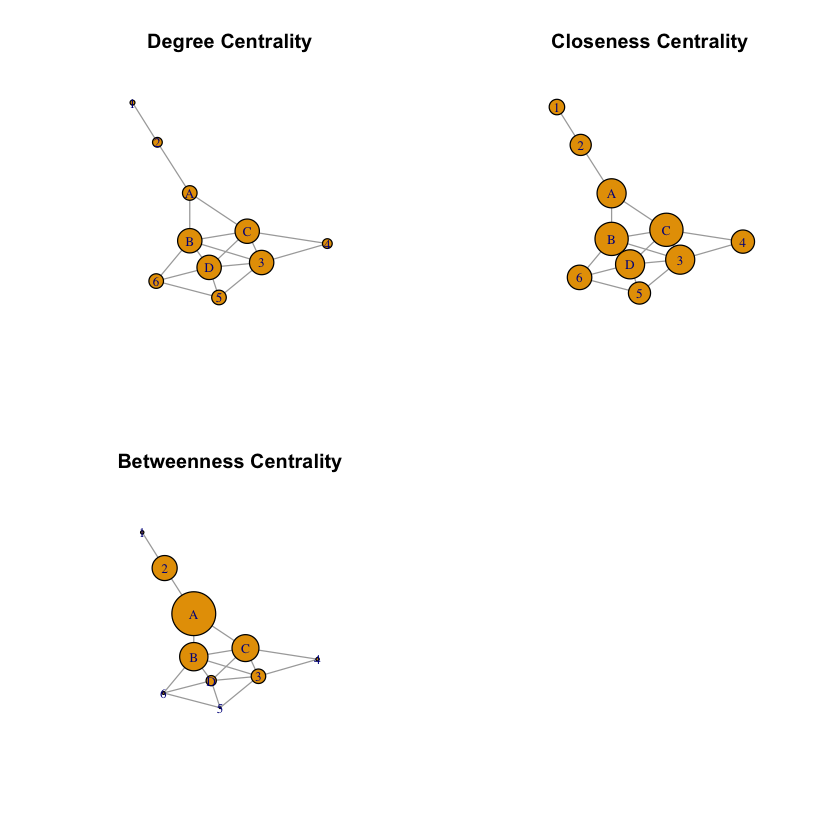

In [18]:
degree_centrality <- degree(graph, mode = "all")
closeness_centrality <- closeness(graph, mode = "all")
betweenness_centrality <- betweenness(graph, directed = FALSE)

# Set up the layout of the graph just once to use in all plots
layout <- layout_with_fr(graph)

# Set up the plotting area
par(mfrow = c(2, 2))

# Degree Centrality Plot
plot(graph, layout = layout,
     vertex.label = V(graph)$name,
vertex.size = degree_centrality * 5,
vertex.label.cex = 0.8,
edge.arrow.size = 0.5,
main = "Degree Centrality")

# Closeness Centrality Plot
plot(graph, layout = layout,
     vertex.label = V(graph)$name,
vertex.size = closeness_centrality * 500,  # Scale factor to make the sizes visible, adjust as needed
vertex.label.cex = 0.8,
edge.arrow.size = 0.5,
main = "Closeness Centrality")

# Betweenness Centrality Plot
plot(graph, layout = layout,
     vertex.label = V(graph)$name,
vertex.size = betweenness_centrality / max(betweenness_centrality) * 50,  # Normalize and scale, adjust as needed
vertex.label.cex = 0.8,
edge.arrow.size = 0.5,
main = "Betweenness Centrality")

# Resetting to default single plotting layout
par(mfrow = c(1, 1))
par(mai = c(0, 0, 0.5, 0.5))